# imports, csv read and formatting

In [1]:
%load_ext autoreload
%autoreload 2
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.simfunc.simulation import Simulation  # class for simulation
from src.utils.simparam import SimParam  # class for simulation parameters
from src.utils.utils import day_graph, minutes_to_hms

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# read csv
data = pd.read_csv("/home/antoine/projects/pax-flow-sim/data/raw/OneFlight.csv")

# table should be formatted with following columns
# | A/D | T1/T2(MM/9C/7C/TW) | Intl Regions | Category(P/C/O) | Sector |
# | Flight Number | SEATS FC | PAX_SUM FC | Flight Date | Scheduled Time |

data["T1/T2(MM/9C/7C/TW)"] = data["Terminal"].replace(
    {"N": "T1", "S": "T1", 1: "T1", "L": "T2", np.nan: "-"}
)

data["Category(P/C/O)"] = data["Flight Type"].apply(lambda x: x[0])

dct_name_change = {
    "Int / Dom": "Sector",
    "Int P Region": "Intl Regions",
    "Fight Number": "Flight Number",  # <- to be split with space between letters and digits
    "Seats": "SEATS FC",
    "PAX": "PAX_SUM FC",
    "Date": "Flight Date",
    "Time": "Scheduled Time",
}

data_formatted = data.rename(columns=dct_name_change)


# check-in

In [3]:
simparam = SimParam()
simparam.schedule_from_df(data_formatted).schedule_cleanup().assign_check_in()
simparam.show_up_from_file().assign_flight_show_up_category_default().assign_show_up()


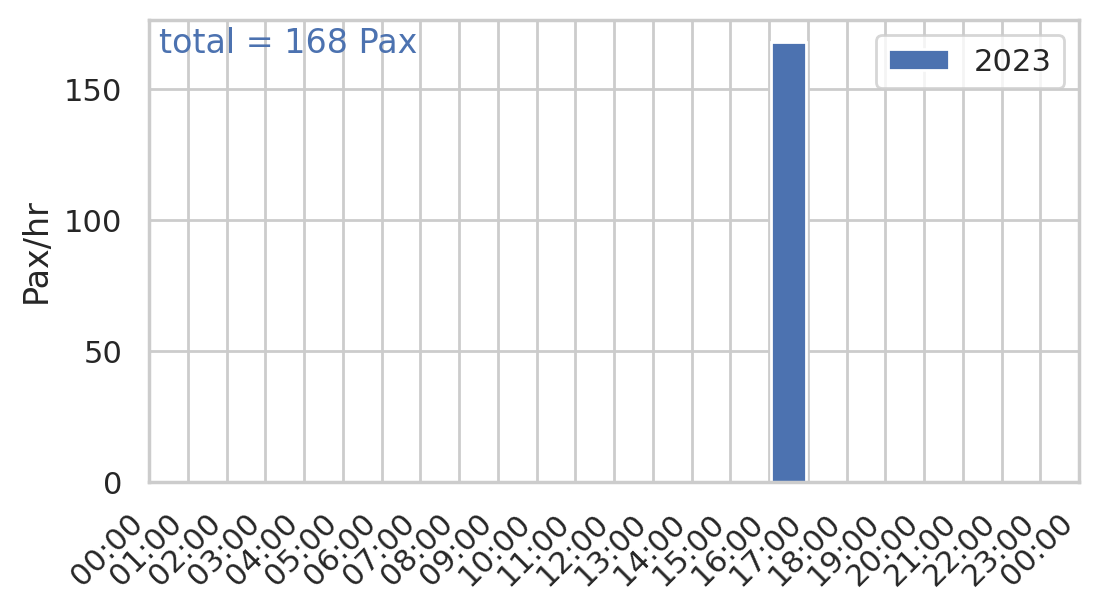

In [4]:
simparam.plot_std()

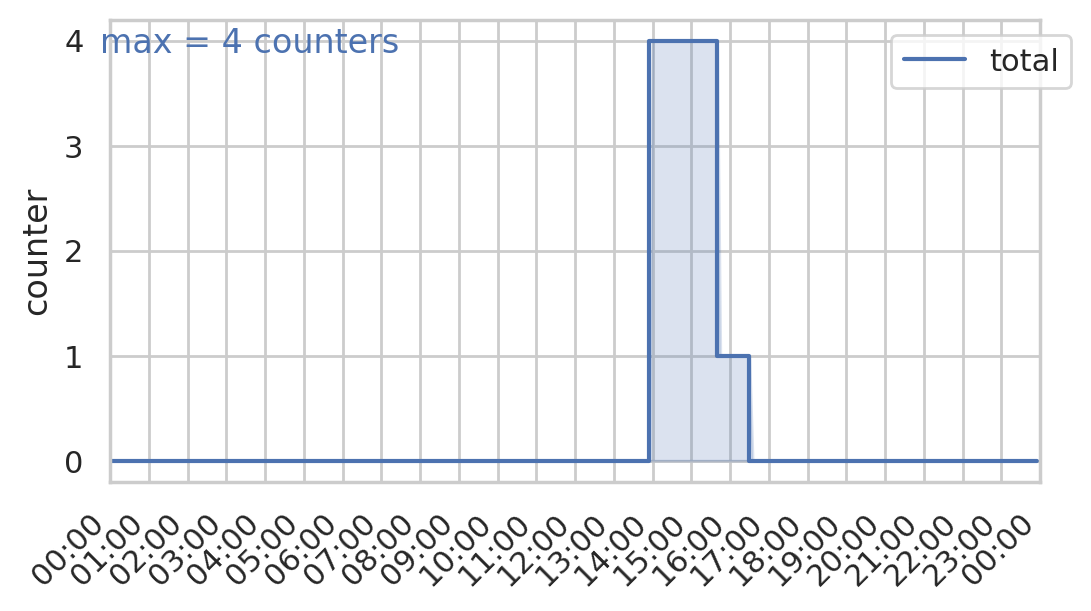

In [5]:
simparam.plot_counters()

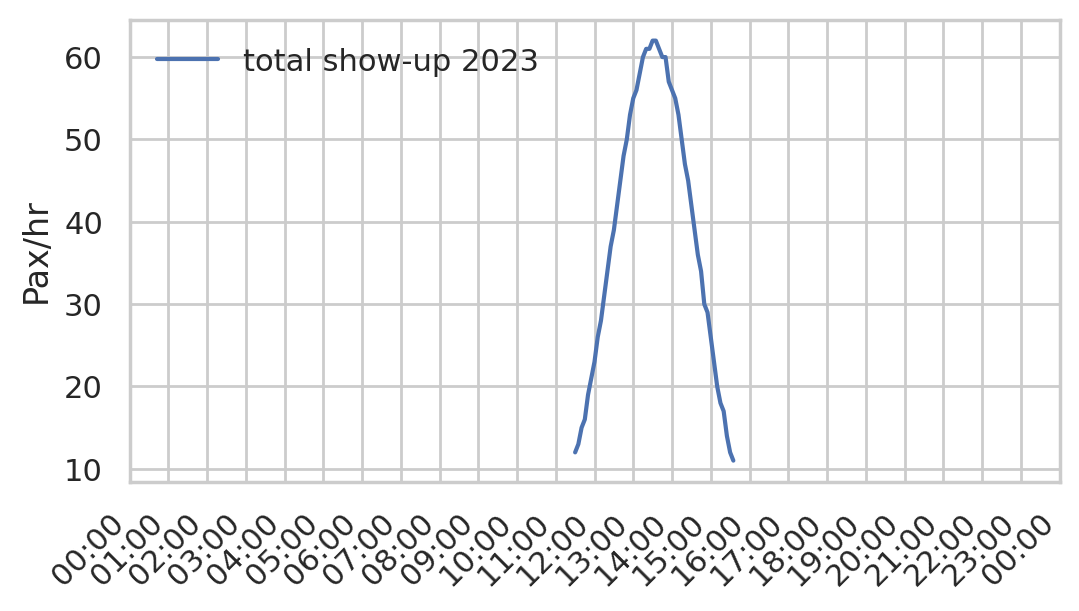

In [6]:
simparam.plot_df_Pax()

In [7]:
simparam.df_Pax["pax_type"] = "tradi"

simparam.dct_resource = {
    # "kiosk": 92,
}

simparam.dct_processes = {
    # "kiosk": 70,
    "checkin": 100,
}

simparam.dct_process_sequence = {
    "tradi": [
        ["wait_opening", "checkin"],
        {"hour_to_std": 2.5},
    ],
}

In [17]:
simulation = Simulation(simparam)
simulation.generate_checkin().generate_pax()
simulation.run()


Simulation running...: 100%|██████████| 1439/1439 [00:00<00:00, 5570.22it/s]


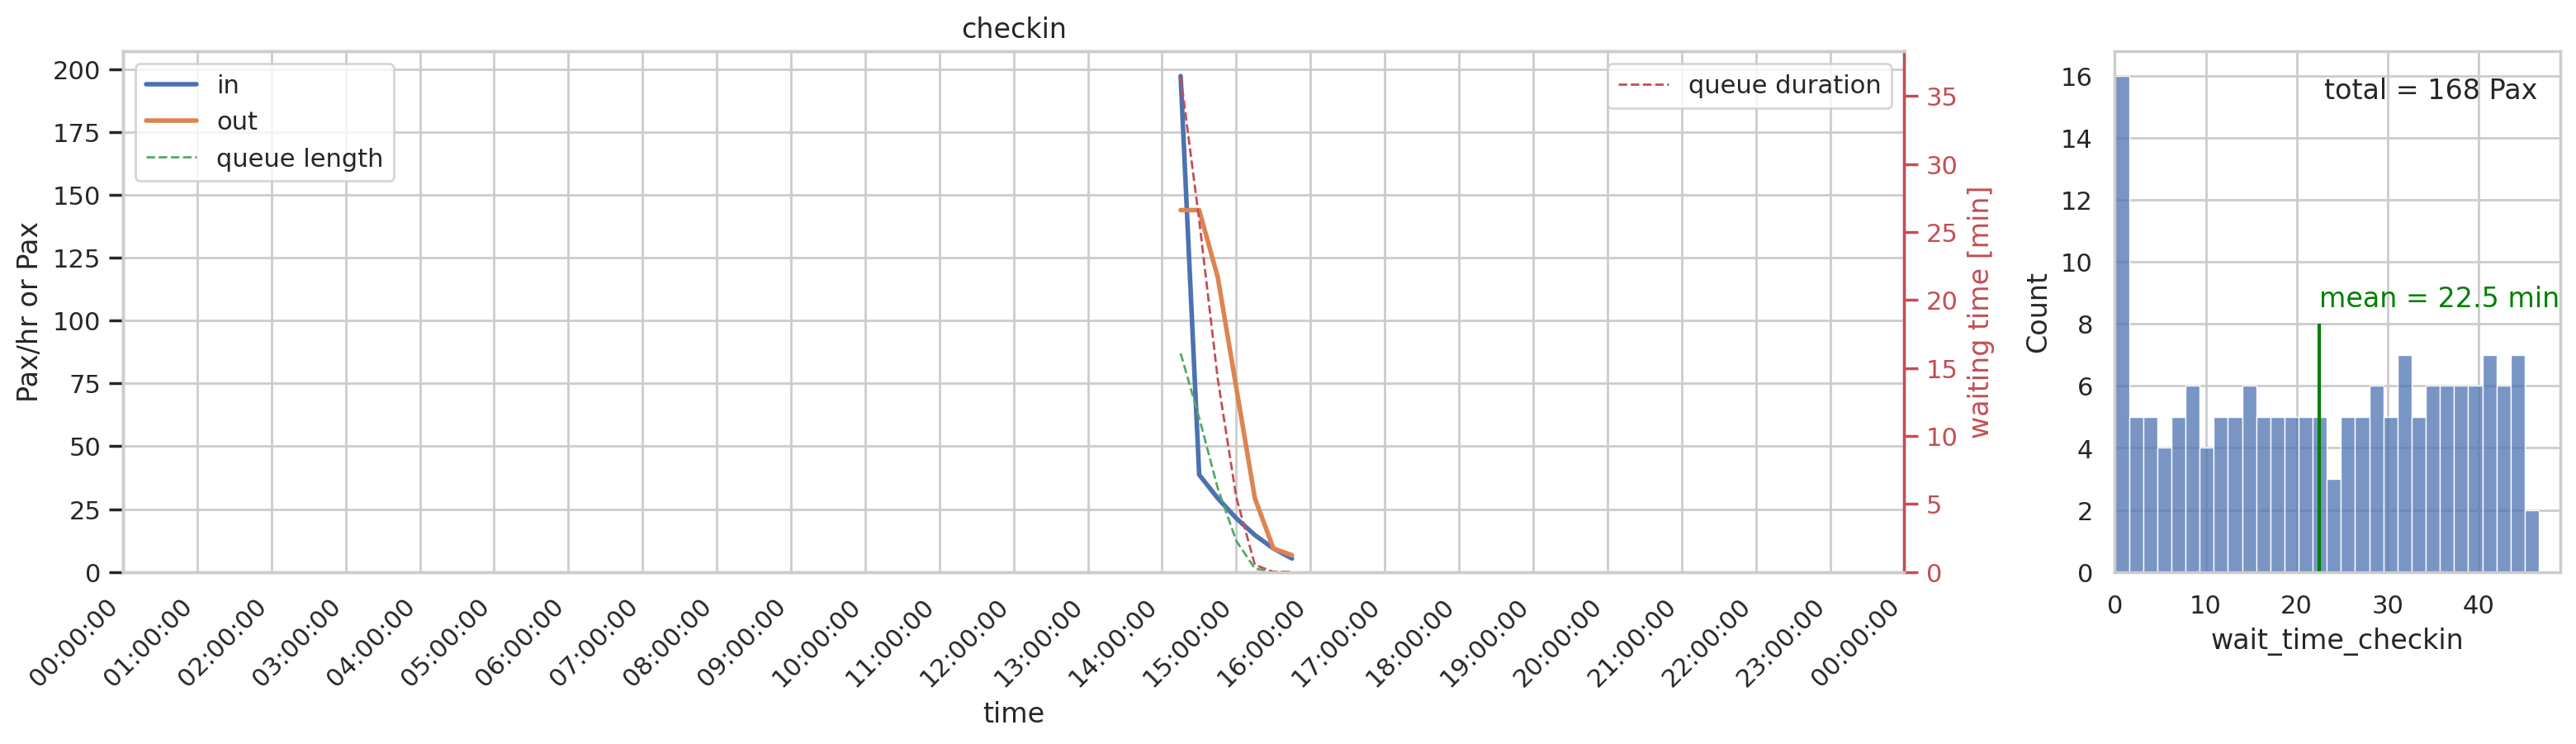

In [20]:
simulation.format_df_result(freq='15min').plot_result()

In [13]:
simulation.df_result.to_csv('/home/antoine/projects/pax-flow-sim/reports/output.csv')

In [14]:
simulation.df_result

,Flight Number,time,Scheduled Time,Category,Pax,minutes,Airline,pax_type,checkin_queue_length,start_checkin_queue,end_checkin_queue,end_checkin_process,wait_time_checkin
0,7C 1383,2020-10-13 11:03:05,2020-10-13 16:30:00,LCC,1,663.083333,7C,tradi,0,2020-10-13 14:00:00,2020-10-13 14:00:00,2020-10-13 14:01:39,0 days 00:00:00
1,7C 1383,2020-10-13 11:14:30,2020-10-13 16:30:00,LCC,1,674.5,7C,tradi,0,2020-10-13 14:00:00,2020-10-13 14:00:00,2020-10-13 14:01:39,0 days 00:00:00
2,7C 1383,2020-10-13 11:22:43,2020-10-13 16:30:00,LCC,1,682.716667,7C,tradi,0,2020-10-13 14:00:00,2020-10-13 14:00:00,2020-10-13 14:01:39,0 days 00:00:00
3,7C 1383,2020-10-13 11:29:15,2020-10-13 16:30:00,LCC,1,689.25,7C,tradi,0,2020-10-13 14:00:00,2020-10-13 14:00:00,2020-10-13 14:01:39,0 days 00:00:00
4,7C 1383,2020-10-13 11:34:43,2020-10-13 16:30:00,LCC,1,694.716667,7C,tradi,1,2020-10-13 14:00:00,2020-10-13 14:01:39,2020-10-13 14:03:19,0 days 00:01:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7C 1383,2020-10-13 15:29:17,2020-10-13 16:30:00,LCC,1,929.283333,7C,tradi,0,2020-10-13 15:29:16,2020-10-13 15:29:16,2020-10-13 15:30:56,0 days 00:00:00
164,7C 1383,2020-10-13 15:34:44,2020-10-13 16:30:00,LCC,1,934.733333,7C,tradi,0,2020-10-13 15:34:44,2020-10-13 15:34:44,2020-10-13 15:36:23,0 days 00:00:00
165,7C 1383,2020-10-13 15:41:16,2020-10-13 16:30:00,LCC,1,941.266667,7C,tradi,0,2020-10-13 15:41:15,2020-10-13 15:41:15,2020-10-13 15:42:55,0 days 00:00:00
166,7C 1383,2020-10-13 15:49:28,2020-10-13 16:30:00,LCC,1,949.466667,7C,tradi,0,2020-10-13 15:49:28,2020-10-13 15:49:28,2020-10-13 15:51:07,0 days 00:00:00
